<a href="https://colab.research.google.com/github/FaithMutua-code/Week3AssignmentAI/blob/main/ClassicalMLwith_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [8]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

Step 1: Load the Iris dataset from CSV

In [9]:
df = pd.read_csv('Iris.csv')

Step 2: Preprocess data.....
 Check for missing values (none in this dataset, but good practice)

In [10]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())  # Should be all 0, confirming clean dataset

# Drop the 'Id' column as it's not a feature
df = df.drop('Id', axis=1)

# Encode categorical 'Species' column to numeric labels
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])  # Converts Iris-setosa=0, Iris-versicolor=1, Iris-virginica=2
print("\nEncoded species mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Missing values per column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Encoded species mapping: {'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}


Step 3: Split into train/test sets

In [11]:
X = df.drop('Species', axis=1)  # Features: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
y = df['Species']  # Target: Encoded species
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Step 4: Train Decision Tree Classifier

In [12]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Step 5: Evaluate

In [13]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Evaluation Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


Visualize feature importances

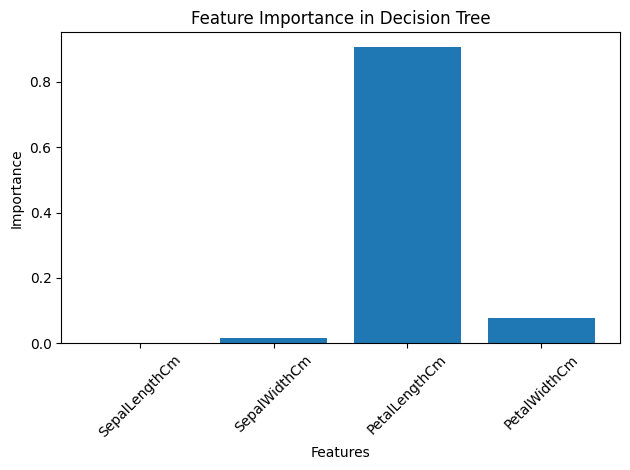

In [14]:
import matplotlib.pyplot as plt
plt.bar(X.columns, clf.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()